In [1]:
## simple chatbot using langraph

In [37]:
from langgraph.graph import StateGraph,START
from typing_extensions import TypedDict

In [38]:
## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [39]:
class state(TypedDict):
    messages:Annotated[list,add_messages]

In [40]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['OPEN_API_KEY']=os.getenv('OPEN_API_KEY')
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0,
    api_key='Your KEY'
)

response=llm.invoke("Hello")
print(response.content)


Hello! How can I assist you today?


In [42]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    api_key='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'
)

response = llm_groq.invoke("Hey I am Anvesh, I like to play cricket")
print(response.content)


Nice to meet you, Anvesh. Cricket is a fantastic sport, and I'm sure you must be passionate about it. Which role do you enjoy playing the most - batsman, bowler, or all-rounder?


In [43]:
from langgraph.graph import StateGraph, START, END

In [44]:
def superbot(state:state):
    return{'messages':[llm_groq.invoke(state['messages'])]}

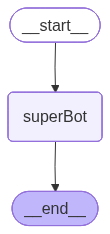

In [45]:
graph=StateGraph(state)

## node
graph.add_node('superBot',superbot)

## Edges
graph.add_edge(START,'superBot')
graph.add_edge('superBot',END)

## Compile
Graph_builder=graph.compile()

## Display
from IPython.display import Image,display
display(Image(Graph_builder.get_graph().draw_mermaid_png()))

In [46]:
## invocation

Graph_builder.invoke({'messages':'Hi my name is anvesh, i like to play cricket'})

{'messages': [HumanMessage(content='Hi my name is anvesh, i like to play cricket', additional_kwargs={}, response_metadata={}, id='039edfdb-8724-4782-9aae-6fe72fb3939d'),
  AIMessage(content="Nice to meet you, Anvesh. Cricket is a fantastic sport, and I'm sure you must be passionate about it. Which role do you enjoy playing the most - batsman, bowler, or all-rounder?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 48, 'total_tokens': 97, 'completion_time': 0.071887668, 'completion_tokens_details': None, 'prompt_time': 0.007706345, 'prompt_tokens_details': None, 'queue_time': 0.007301537, 'total_time': 0.079594013}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_6c980774ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bb538-1156-7581-b8da-d378183e8b90-0', usage_metadata={'input_tokens': 48, 'output_tokens': 49, 'total_tokens': 97})]}

In [47]:
Graph_builder.invoke({'messages':'what is capital of Andhra Pradesh State'})

{'messages': [HumanMessage(content='what is capital of Andhra Pradesh State', additional_kwargs={}, response_metadata={}, id='9cadb618-c2ef-4462-b263-70c52140de37'),
  AIMessage(content='The capital of Andhra Pradesh State is Amaravati.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 43, 'total_tokens': 57, 'completion_time': 0.015161977, 'completion_tokens_details': None, 'prompt_time': 0.003414016, 'prompt_tokens_details': None, 'queue_time': 0.005427363, 'total_time': 0.018575993}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_6c980774ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bb539-2c07-7423-9661-4b973fc480b0-0', usage_metadata={'input_tokens': 43, 'output_tokens': 14, 'total_tokens': 57})]}